<a href="https://colab.research.google.com/github/gakurujnr/Sendy-Logistics-Challenge/blob/master/Copy_of_GROUP_PROJECT_Sendy_logistics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CORE

# GROUP PROJECT

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final 
>destination.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

### Importing Libraries 

#### a. Basic Python Libraries

In [0]:
# Importing os
import os


# Importing Numpy
import numpy as np


# Importing Pandas
import pandas as pd


# Importing Seaborn
import seaborn as sns


# Importing researchpy
!pip install researchpy
import researchpy as rp


# Importing scipy from stats
from scipy import stats


# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_1samp



from IPython.display import display


# Importing warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)



#### b. Machine Learning Libraries

In [0]:

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Importing Data

In [0]:
# Loading the Data from the source i.e. csv
# ---

train = pd.read_csv('Train.csv')

test = pd.read_csv('Test.csv')

riders = pd.read_csv('Riders.csv')


FileNotFoundError: ignored

## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#

print('The train dataset has ', train.shape[1], ' columns and ', train.shape[0], ' rows!')

print('The test dataset has ', test.shape[1], ' columns and ', test.shape[0], ' rows!')

print('The riders dataset has ', riders.shape[1], ' columns and ', riders.shape[0], ' rows!')

In [0]:
# Previewing the top of our dataset
#

train.head(3)

In [0]:
# Test

test.head(3)

In [0]:
# Riders

riders.head(3)

In [0]:
# Previewing the bottom of our dataset
# 

train.tail(3)

In [0]:
test.tail(3)

In [0]:
riders.tail(3)

In [0]:
#variable definitions

variable = pd.read_csv('VariableDefinitions (1).csv')

variable

In [0]:
# Checking whether each column has an appropriate datatype
#
print('TRAIN dtypes:')
print(train.dtypes)

print('\n')

print('TEST dtypes:')
print(test.dtypes)

print('\n')

print('RIDERS dtypes:')
print(riders.dtypes)

In [0]:
# Checking unique values and number of rows asigned for each column in the dataset

for i in train.columns:
  
  print('\n')
  
  print(train[i].value_counts())


In [0]:
# checking the profile of our dataset

import pandas_profiling

pandas_profiling.ProfileReport(train)

## 4. Tidying the Dataset

In [0]:
train.columns

In [0]:
# Checking for Outliers
#
%matplotlib inline

cols = [col for col in train.columns if col not in ['Time from Pickup to Arrival']]

train[cols].plot.box(figsize=(26,5))

plt.show()

In [0]:
# Checking for Anomalies
#

train.describe()

In [0]:
# Identifying existence of missing data in the dataset

train.isnull().any()

In [0]:
# number of missing values

train.isnull().sum()

In [0]:
# Dealing with the Missing Data
#

train.drop(['Precipitation in millimeters'], axis = 1,inplace = True)

test.drop(['Precipitation in millimeters'], axis = 1,inplace = True)

In [0]:
# More data cleaning procedures
#
# Renaming columns
# Train

train.columns = ['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement Day of Month',
       'Placement Weekday', 'Placement Time',
       'Confirmation Day of Month', 'Confirmation Weekday',
       'Confirmation Time', 'Arrival at Pickup Day of Month',
       'Arrival at Pickup Weekday', 'Arrival at Pickup Time',
       'Pickup Day of Month', 'Pickup Weekday', 'Pickup Time',
       'Arrival at Destination Day of Month',
       'Arrival at Destination Weekday',
       'Arrival at Destination Time', 'Distance KM', 'Temperature',
       'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival']

train.columns = train.columns.str.replace(' ','_').str.lower()

# Test

test.columns = ['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement Day of Month',
       'Placement Weekday', 'Placement Time',
       'Confirmation Day of Month', 'Confirmation Weekday',
       'Confirmation Time', 'Arrival at Pickup Day of Month',
       'Arrival at Pickup Weekday', 'Arrival at Pickup Time',
       'Pickup Day of Month', 'Pickup Weekday', 'Pickup Time',
       'Distance KM', 'Temperature',
       'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id']

test.columns = test.columns.str.replace(' ','_').str.lower()


In [0]:
# Filling temperature missing values 

# Train
print('TRAIN:')
print(train.temperature.isnull().any())
train['temperature'] = train.temperature.fillna((train['temperature'].mean()))
print('\n')
print(train.temperature.isnull().any())


# Test
print('\n')
print('TEST:')
print(test.temperature.isnull().any())
test['temperature'] = test.temperature.fillna((test['temperature'].mean()))
print('\n')
print(test.temperature.isnull().any())

In [0]:
# Saving clean data

train.to_csv('trainclean.csv')

test.to_csv('testclean.csv')

### Alternate data(OPTION II)

In [0]:
train.shape

In [0]:
test.shape

In [0]:
train.dropna(axis = 0,inplace = True)

test.dropna(axis = 0,inplace = True)


In [0]:
train.shape

In [0]:
test.shape

In [0]:
# Saving option ii of clean data

train.to_csv('train_no_null.csv')

test.to_csv('test_no_null.csv')

## 5. Exploratory Analysis

### a. Univariate Analysis

In [0]:
# Calculating Skewness in the columns of our dataset

train.skew().plot.bar(figsize =(14,6))
plt.show()

In [0]:
# Measuring curtosis

train.kurt().plot.bar(figsize =(14,6))
plt.show()

### b. Bivariate Analysis

In [0]:
# Ploting the bivariate summaries and recording our observations
#
# correlation heatmap of dataset

def correlation_heatmap(train):
  
    _ , ax = plt.subplots(figsize =(18, 15))
    
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        
        train.corr(), 
        
        cmap = colormap,
        
        square=True, 
        
        cbar_kws={'shrink':.9 }, 
        
        ax=ax,
        
        annot=True, 
        
        linewidths=0.1,vmax=1.0, linecolor='white',
        
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

In [0]:
# OBSERVATION: 

In [0]:
# Crossplots distribution

plt.figure(figsize=(14, 14))




sns.pairplot(train, diag_kind='kde');

### c. Multivariate Analysis

#### Converting Categorical columns to numerical

In [0]:
# importing clean data 

train = pd.read_csv('trainclean.csv', index_col = 0)

test  = pd.read_csv('testclean.csv', index_col = 0)

In [0]:
# Converting categorical columns to numerical

train['personal_or_business'] = train.personal_or_business.map({'Business':0, 'Personal': 1})

test['personal_or_business'] = test.personal_or_business.map({'Business':0, 'Personal': 1})

In [0]:
# Converting time columns from 12hr categorical columns to 24 hour numeric format columns

# TRAIN

train['placement_time'] = pd.to_datetime(train['placement_time']).dt.strftime('%H:%M:%S')

train['confirmation_time'] = pd.to_datetime(train['confirmation_time']).dt.strftime('%H:%M:%S')

train['pickup_time'] = pd.to_datetime(train['pickup_time']).dt.strftime('%H:%M:%S')

train['arrival_at_pickup_time'] = pd.to_datetime(train['arrival_at_pickup_time']).dt.strftime('%H:%M:%S')

train['arrival_at_destination_time'] = pd.to_datetime(train['arrival_at_destination_time']).dt.strftime('%H:%M:%S')


# TEST

test['placement_time'] = pd.to_datetime(test['placement_time']).dt.strftime('%H:%M:%S')

test['confirmation_time'] = pd.to_datetime(test['confirmation_time']).dt.strftime('%H:%M:%S')

test['pickup_time'] = pd.to_datetime(test['pickup_time']).dt.strftime('%H:%M:%S')

test['arrival_at_pickup_time'] = pd.to_datetime(test['arrival_at_pickup_time']).dt.strftime('%H:%M:%S')

In [0]:
test.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday,placement_time,confirmation_day_of_month,confirmation_weekday,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,arrival_at_pickup_time,pickup_day_of_month,pickup_weekday,pickup_time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id
0,Order_No_19248,User_Id_3355,Bike,3,0,27,3,16:44:10,27,3,16:44:29,27,3,16:53:04,27,3,17:06:47,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,0,17,5,12:57:35,17,5,12:59:17,17,5,13:20:27,17,5,13:25:37,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,0,27,4,11:08:14,27,4,11:25:05,27,4,11:33:20,27,4,11:57:54,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,0,17,1,13:51:35,17,1,13:53:27,17,1,14:02:41,17,1,14:16:52,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,0,11,2,11:30:28,11,2,11:34:45,11,2,11:47:19,11,2,11:56:04,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [0]:
train.dropna(axis = 0, how = 'any', inplace = True)

In [0]:
train.isnull().sum()

order_no                               0
user_id                                0
vehicle_type                           0
platform_type                          0
personal_or_business                   0
placement_day_of_month                 0
placement_weekday                      0
placement_time                         0
confirmation_day_of_month              0
confirmation_weekday                   0
confirmation_time                      0
arrival_at_pickup_day_of_month         0
arrival_at_pickup_weekday              0
arrival_at_pickup_time                 0
pickup_day_of_month                    0
pickup_weekday                         0
pickup_time                            0
arrival_at_destination_day_of_month    0
arrival_at_destination_weekday         0
arrival_at_destination_time            0
distance_km                            0
temperature                            0
pickup_lat                             0
pickup_long                            0
destination_lat 

#####Splitting the time column into hours and minutes

In [0]:
cols = ['placement_time', 'confirmation_time', 'arrival_at_pickup_time', 'pickup_time', 'arrival_at_destination_time']
new_cols = ['placement', 'confirmation', 'p_arrival', 'pickup', 'd_arrival']

cols1 = ['placement_time', 'confirmation_time', 'arrival_at_pickup_time', 'pickup_time']
new_cols1 = ['placement', 'confirmation', 'p_arrival', 'pickup']


def time_in_seconds(x):
    x = int(x[:2]) * 60*60 + int(x[3:5]) *60 +int(x[-2:])
    return x
for i, j in zip(new_cols, cols):
  train[i] = train[j].apply(lambda x: time_in_seconds(x))

for k,l in zip(new_cols1, cols1):
  test[k] = test[l].apply(lambda x: time_in_seconds(x))

In [0]:
new_cols = ['placement', 'confirmation', 'p_arrival', 'pickup', 'd_arrival']
col_sine = ['placement_stime', 'confirmation_stime', 'parrival_stime', 'pickup_stime', 'darrival_stime']
col_cosine = ['placement_ctime', 'confirmation_ctime', 'parrival_ctime', 'pickup_ctime', 'darrival_ctime']


for s, t, v in zip(col_sine, col_cosine,new_cols):
  train[s], train[t]  = train[v].apply(lambda x: np.sin(2*np.pi*x/(24 * 60 * 60))) , train[v].apply(lambda x: np.cos(2*np.pi*x/(24 * 60 * 60)))
  train.assign(s = train[s], t = train[t])
  
for s, t, v in zip(col_sine, col_cosine,new_cols1):
  test[s], test[t]  = test[v].apply(lambda x: np.sin(2*np.pi*x/(24 * 60 * 60))) , test[v].apply(lambda x: np.cos(2*np.pi*x/(24 * 60 * 60)))
  test.assign(s = test[s], t = test[t])

In [0]:
train.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday,placement_time,confirmation_day_of_month,confirmation_weekday,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,arrival_at_pickup_time,pickup_day_of_month,pickup_weekday,pickup_time,arrival_at_destination_day_of_month,arrival_at_destination_weekday,arrival_at_destination_time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,placement,confirmation,p_arrival,pickup,d_arrival
0,Order_No_4211,User_Id_633,Bike,3,0,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,34546,34810,36287,37650,38395
1,Order_No_25375,User_Id_2285,Bike,3,1,12,5,11:16:16,12,5,11:23:21,12,5,11:40:22,12,5,11:44:09,12,5,12:17:22,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,40576,41001,42022,42249,44242
2,Order_No_1899,User_Id_265,Bike,3,0,30,2,12:39:25,30,2,12:42:44,30,2,12:49:34,30,2,12:53:03,30,2,13:00:38,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,45565,45764,46174,46383,46838
3,Order_No_9336,User_Id_1402,Bike,3,0,15,5,09:25:34,15,5,09:26:05,15,5,09:37:56,15,5,09:43:06,15,5,10:05:27,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,33934,33965,34676,34986,36327
4,Order_No_27883,User_Id_1737,Bike,1,1,13,1,09:55:18,13,1,09:56:18,13,1,10:03:53,13,1,10:05:23,13,1,10:25:37,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,35718,35778,36233,36323,37537


In [0]:
test.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday,placement_time,confirmation_day_of_month,confirmation_weekday,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,arrival_at_pickup_time,pickup_day_of_month,pickup_weekday,pickup_time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,placement,confirmation,p_arrival,pickup
0,Order_No_19248,User_Id_3355,Bike,3,0,27,3,16:44:10,27,3,16:44:29,27,3,16:53:04,27,3,17:06:47,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,60250,60269,60784,61607
1,Order_No_12736,User_Id_3647,Bike,3,0,17,5,12:57:35,17,5,12:59:17,17,5,13:20:27,17,5,13:25:37,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,46655,46757,48027,48337
2,Order_No_768,User_Id_2154,Bike,3,0,27,4,11:08:14,27,4,11:25:05,27,4,11:33:20,27,4,11:57:54,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,40094,41105,41600,43074
3,Order_No_15332,User_Id_2910,Bike,3,0,17,1,13:51:35,17,1,13:53:27,17,1,14:02:41,17,1,14:16:52,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,49895,50007,50561,51412
4,Order_No_21373,User_Id_1205,Bike,3,0,11,2,11:30:28,11,2,11:34:45,11,2,11:47:19,11,2,11:56:04,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,41428,41685,42439,42964


In [0]:
train.columns

Index(['platform_type', 'personal_or_business', 'placement_day_of_month',
       'placement_weekday', 'confirmation_day_of_month',
       'confirmation_weekday', 'arrival_at_pickup_day_of_month',
       'arrival_at_pickup_weekday', 'pickup_day_of_month', 'pickup_weekday',
       'distance_km', 'temperature', 'pickup_lat', 'pickup_long',
       'destination_lat', 'destination_long', 'time_from_pickup_to_arrival',
       'placement_stime', 'placement_ctime', 'confirmation_stime',
       'confirmation_ctime', 'parrival_stime', 'parrival_ctime',
       'pickup_stime', 'pickup_ctime', 'order_time', 'travel_time',
       'waiting_time'],
      dtype='object')

In [0]:
# TRAIN
#
train['order_time'] = train.confirmation - train.placement
train['travel_time'] = train.p_arrival - train.confirmation
train['waiting_time'] = train.pickup - train.p_arrival


In [0]:
# TEST
#
test['order_time'] = test.confirmation - test.placement
test['travel_time'] = test.p_arrival - test.confirmation
test['waiting_time'] = test.pickup - test.p_arrival

In [0]:
train.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday,placement_time,confirmation_day_of_month,confirmation_weekday,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,arrival_at_pickup_time,pickup_day_of_month,pickup_weekday,pickup_time,arrival_at_destination_day_of_month,arrival_at_destination_weekday,arrival_at_destination_time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,placement,confirmation,p_arrival,pickup,d_arrival
0,Order_No_4211,User_Id_633,Bike,3,0,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,34546,34810,36287,37650,38395
1,Order_No_25375,User_Id_2285,Bike,3,1,12,5,11:16:16,12,5,11:23:21,12,5,11:40:22,12,5,11:44:09,12,5,12:17:22,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,40576,41001,42022,42249,44242
2,Order_No_1899,User_Id_265,Bike,3,0,30,2,12:39:25,30,2,12:42:44,30,2,12:49:34,30,2,12:53:03,30,2,13:00:38,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,45565,45764,46174,46383,46838
3,Order_No_9336,User_Id_1402,Bike,3,0,15,5,09:25:34,15,5,09:26:05,15,5,09:37:56,15,5,09:43:06,15,5,10:05:27,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,33934,33965,34676,34986,36327
4,Order_No_27883,User_Id_1737,Bike,1,1,13,1,09:55:18,13,1,09:56:18,13,1,10:03:53,13,1,10:05:23,13,1,10:25:37,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,35718,35778,36233,36323,37537


In [0]:
train.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type',
       'personal_or_business', 'placement_day_of_month', 'placement_weekday',
       'placement_time', 'confirmation_day_of_month', 'confirmation_weekday',
       'confirmation_time', 'arrival_at_pickup_day_of_month',
       'arrival_at_pickup_weekday', 'arrival_at_pickup_time',
       'pickup_day_of_month', 'pickup_weekday', 'pickup_time',
       'arrival_at_destination_day_of_month', 'arrival_at_destination_weekday',
       'arrival_at_destination_time', 'distance_km', 'temperature',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'rider_id', 'time_from_pickup_to_arrival', 'placement', 'confirmation',
       'p_arrival', 'pickup', 'd_arrival'],
      dtype='object')

In [0]:
test.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday,placement_time,confirmation_day_of_month,confirmation_weekday,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,arrival_at_pickup_time,pickup_day_of_month,pickup_weekday,pickup_time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,placement,confirmation,p_arrival,pickup
0,Order_No_19248,User_Id_3355,Bike,3,0,27,3,16:44:10,27,3,16:44:29,27,3,16:53:04,27,3,17:06:47,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,60250,60269,60784,61607
1,Order_No_12736,User_Id_3647,Bike,3,0,17,5,12:57:35,17,5,12:59:17,17,5,13:20:27,17,5,13:25:37,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,46655,46757,48027,48337
2,Order_No_768,User_Id_2154,Bike,3,0,27,4,11:08:14,27,4,11:25:05,27,4,11:33:20,27,4,11:57:54,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,40094,41105,41600,43074
3,Order_No_15332,User_Id_2910,Bike,3,0,17,1,13:51:35,17,1,13:53:27,17,1,14:02:41,17,1,14:16:52,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,49895,50007,50561,51412
4,Order_No_21373,User_Id_1205,Bike,3,0,11,2,11:30:28,11,2,11:34:45,11,2,11:47:19,11,2,11:56:04,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,41428,41685,42439,42964


In [0]:
droppers = ['order_no', 'user_id', 'vehicle_type', 'rider_id', 'placement', 'confirmation',
       'p_arrival', 'pickup', 'd_arrival', 'placement_time','confirmation_time','arrival_at_pickup_time', 'pickup_time','arrival_at_destination_day_of_month','arrival_at_destination_weekday', 'arrival_at_destination_time','darrival_stime','darrival_ctime']
train.drop(droppers, axis = 1, inplace = True)

In [0]:
dropping = ['order_no', 'user_id', 'vehicle_type', 'rider_id', 'placement', 'confirmation',
       'p_arrival', 'pickup', 'placement_time','confirmation_time','arrival_at_pickup_time', 'pickup_time']
to_test = test.drop(dropping, axis = 1)

In [0]:
to_test.head()

,platform_type,personal_or_business,placement_day_of_month,placement_weekday,confirmation_day_of_month,confirmation_weekday,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,pickup_day_of_month,pickup_weekday,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,placement_stime,placement_ctime,confirmation_stime,confirmation_ctime,parrival_stime,parrival_ctime,pickup_stime,pickup_ctime,order_time,travel_time,waiting_time
0,3,0,27,3,27,3,27,3,27,3,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,-0.945755,-0.324880,-0.946203,-0.323573,-0.957655,-0.287918,-0.973162,-0.230121,19,515,823
1,3,0,17,5,17,5,17,5,17,5,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,-0.248619,-0.968601,-0.255797,-0.966730,-0.343865,-0.939019,-0.364944,-0.931029,102,1270,310
2,3,0,27,4,27,4,27,4,27,4,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,0.223959,-0.974599,0.151764,-0.988417,0.116093,-0.993238,0.009163,-0.999958,1011,495,1474
3,3,0,17,1,17,1,17,1,17,1,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,-0.467866,-0.883800,-0.475048,-0.879960,-0.510105,-0.860112,-0.562324,-0.826917,112,554,851
4,3,0,11,2,11,2,11,2,11,2,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,0.128507,-0.991709,0.109951,-0.993937,0.055313,-0.998469,0.017162,-0.999853,257,754,525


In [0]:
train.head()

,platform_type,personal_or_business,placement_day_of_month,placement_weekday,confirmation_day_of_month,confirmation_weekday,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,pickup_day_of_month,pickup_weekday,arrival_at_destination_day_of_month,arrival_at_destination_weekday,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,placement_stime,placement_ctime,confirmation_stime,confirmation_ctime,parrival_stime,parrival_ctime,pickup_stime,pickup_ctime,darrival_stime,darrival_ctime,order_time,travel_time,waiting_time
0,3,0,9,5,9,5,9,5,9,5,9,5,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,0.588609,-0.808418,0.572981,-0.819569,0.481817,-0.876272,0.392738,-0.919650,0.342362,-0.939568,264,1477,1363
1,3,1,12,5,12,5,12,5,12,5,12,5,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,0.189667,-0.981849,0.159235,-0.987241,0.085562,-0.996333,0.069104,-0.997609,-0.075704,-0.997130,425,1021,227
2,3,0,30,2,30,2,30,2,30,2,30,2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,-0.171141,-0.985247,-0.185381,-0.982667,-0.214593,-0.976703,-0.229413,-0.973329,-0.261487,-0.965207,199,410,209
3,3,0,15,5,15,5,15,5,15,5,15,5,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,0.623993,-0.781430,0.622230,-0.782834,0.580940,-0.813947,0.562444,-0.826835,0.479266,-0.877669,31,711,310
4,1,1,13,1,13,1,13,1,13,1,13,1,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,0.517654,-0.855590,0.513916,-0.857841,0.485255,-0.874373,0.479522,-0.877530,0.400282,-0.916392,60,455,90


In [0]:
test.head()

,platform_type,personal_or_business,placement_day_of_month,placement_weekday,confirmation_day_of_month,confirmation_weekday,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,pickup_day_of_month,pickup_weekday,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,placement_stime,placement_ctime,confirmation_stime,confirmation_ctime,parrival_stime,parrival_ctime,pickup_stime,pickup_ctime
0,3,0,27,3,27,3,27,3,27,3,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,-0.945755,-0.324880,-0.946203,-0.323573,-0.957655,-0.287918,-0.973162,-0.230121
1,3,0,17,5,17,5,17,5,17,5,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,-0.248619,-0.968601,-0.255797,-0.966730,-0.343865,-0.939019,-0.364944,-0.931029
2,3,0,27,4,27,4,27,4,27,4,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,0.223959,-0.974599,0.151764,-0.988417,0.116093,-0.993238,0.009163,-0.999958
3,3,0,17,1,17,1,17,1,17,1,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,-0.467866,-0.883800,-0.475048,-0.879960,-0.510105,-0.860112,-0.562324,-0.826917
4,3,0,11,2,11,2,11,2,11,2,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,0.128507,-0.991709,0.109951,-0.993937,0.055313,-0.998469,0.017162,-0.999853


In [0]:
train.to_csv('trainsuperclean.csv')

In [0]:
to_test.to_csv('testsuperclean.csv')

In [0]:
trained = pd.read_csv('trainsuperclean.csv', index_col = 0)

trained.head(2)

,platform_type,personal_or_business,placement_day_of_month,placement_weekday,confirmation_day_of_month,confirmation_weekday,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,pickup_day_of_month,pickup_weekday,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,placement_stime,placement_ctime,confirmation_stime,confirmation_ctime,parrival_stime,parrival_ctime,pickup_stime,pickup_ctime,order_time,travel_time,waiting_time
0,3,0,9,5,9,5,9,5,9,5,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,0.588609,-0.808418,0.572981,-0.819569,0.481817,-0.876272,0.392738,-0.919650,264,1477,1363
1,3,1,12,5,12,5,12,5,12,5,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993,0.189667,-0.981849,0.159235,-0.987241,0.085562,-0.996333,0.069104,-0.997609,425,1021,227


In [0]:
tested = pd.read_csv('testsuperclean.csv', index_col = 0)

tested.head()

,platform_type,personal_or_business,placement_day_of_month,placement_weekday,confirmation_day_of_month,confirmation_weekday,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday,pickup_day_of_month,pickup_weekday,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,placement_stime,placement_ctime,confirmation_stime,confirmation_ctime,parrival_stime,parrival_ctime,pickup_stime,pickup_ctime,order_time,travel_time,waiting_time
0,3,0,27,3,27,3,27,3,27,3,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,-0.945755,-0.324880,-0.946203,-0.323573,-0.957655,-0.287918,-0.973162,-0.230121,19,515,823
1,3,0,17,5,17,5,17,5,17,5,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,-0.248619,-0.968601,-0.255797,-0.966730,-0.343865,-0.939019,-0.364944,-0.931029,102,1270,310
2,3,0,27,4,27,4,27,4,27,4,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,0.223959,-0.974599,0.151764,-0.988417,0.116093,-0.993238,0.009163,-0.999958,1011,495,1474
3,3,0,17,1,17,1,17,1,17,1,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,-0.467866,-0.883800,-0.475048,-0.879960,-0.510105,-0.860112,-0.562324,-0.826917,112,554,851
4,3,0,11,2,11,2,11,2,11,2,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,0.128507,-0.991709,0.109951,-0.993937,0.055313,-0.998469,0.017162,-0.999853,257,754,525


#### Splitting Data Target & Feature sets

In [0]:
# Selecting the columns to be used as data for accuracy testing

X = trained.drop('time_from_pickup_to_arrival', axis = 1)

#assigning the target column

y = trained['time_from_pickup_to_arrival']



In [0]:
# Defining the train and test sets
X_train = X
X_test = tested
y_train = y

In [0]:
print(X_train.shape)
print(X_test.shape)

(21201, 27)
(7068, 27)


### Normalisation & P.C.A

In [0]:
# Normalizing the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)
  

In [0]:
# Applying PCA

from sklearn.decomposition import PCA
  
pca = PCA()
  
X_train = pca.fit_transform(X_train)
  
X_test = pca.transform(X_test)
  

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
#print(f'accuracy: {accuracy_score(y_test, y_pred)}')
#error = mean_squared_error(y_pred)
#print(np.sqrt(error))
#r2_score(y_test, y_pred)

In [0]:
submission = pd.DataFrame({'Order_No': test['order_no'], 'Time from Pickup to Arrival': y_pred})
submission.to_csv('sendy.csv',index = False)


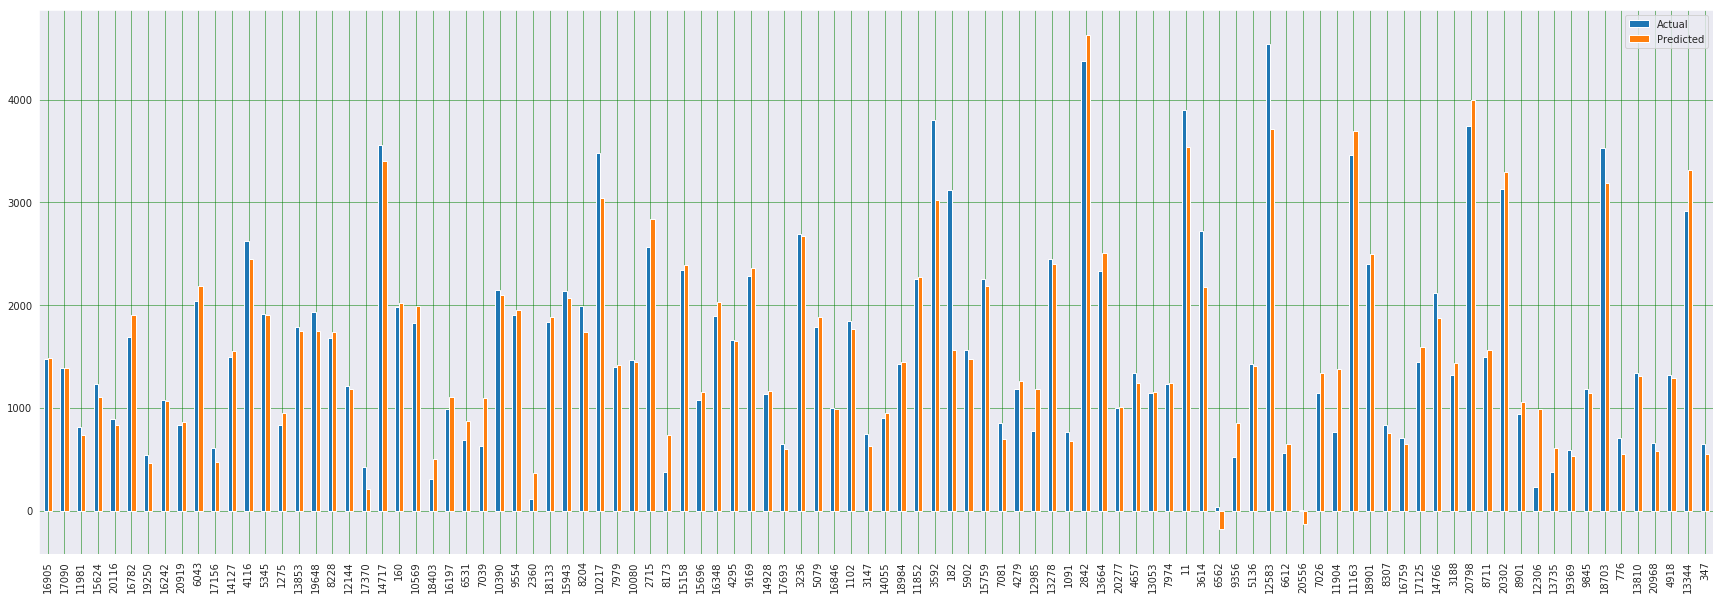

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1 = df.head(100)
df1.plot(kind='bar',figsize=(30,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


### Testing our Machine Learning Model

#### Random Forest Model

In [0]:
components = {}

for i in np.arange(1, len(X.columns)+1):
  
  
  # Training and Making Predictions
  
  # The random forest classification classifier has been used to make predictions.
  
  from sklearn.linear_model import LogisticRegression
  
  classifier = LogisticRegression(random_state = 0)
  
  classifier.fit(X, y)
  
  
  # Predicting the Test set results
  
  y_pred = classifier.predict(X_test)
  
  
  # Performing evaluation
  
  from sklearn.metrics import confusion_matrix
  
  from sklearn.metrics import accuracy_score
  
  cm = confusion_matrix(y, y_pred)
  
  acc = accuracy_score(y, y_pred)
  
  
  print(cm)
  
  print(acc)
  
components.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})

components

## 6. Implementing the Solution

In [0]:
# Implementing the Solution
# 
x = df.groupby(['']).sum().copy()

ax = x.sort_values(by = '',ascending=False).plot(kind='bar', figsize=(18, 5));

for p in ax.patches:
  
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() /89.170) )+ "%", 
                
                (p.get_x() * 1.007, p.get_height() * 0.75),
                
                color='black')


## 7. Challenging the solution

In [0]:
#predicting with xgboost

model = XGBClassifier(n_estimators=1500,learning_rate =0.25)

model.fit(X, y)

In [0]:
# Calculating Feature Importance

print(model.feature_importances_)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

In [0]:
# make predictions for test data

y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

In [0]:
# Model Accuracy

model.score(X, y)

In [0]:
# Feature Importance Visualization

importances.plot.bar()

plt.show()

## 8. Follow up questions

### a). Did we have the right data?

>.......

### b). Do we need other data to answer our question?

>.........

### c). Did we have the right question?

>........

## Conclusion

>................